<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/EDA_MYIn_Class_Lab_Exercise_(Day_4)_Questions_%5Bv3_0_121020%5D_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [ ]:
ho= pd.read_csv('/content/house.csv')
ma= pd.read_csv('/content/malaria.csv')

### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
print(ho.isna().sum())
print(ma.isna().sum())
print(ho.shape)
print(ma.shape)

# NO

Rooms         0
Type          0
Price         0
Method        0
Regionname    0
Bathroom      0
Car           0
Landsize      0
Distance      0
Bedroom       0
dtype: int64
Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64
(4766, 10)
(127, 16)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
e= []
for i in ma.columns:
  r= len(ma[i])
  t= ma[i].isna().sum()
  if (t/r)*100 >= 60:
    e.append(i)

In [ ]:
e

['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

In [ ]:
f= []
for i in ho.columns:
  r= len(ho[i])
  t= ho[i].isna().sum()
  if (t/r)*100 >= 60:
    e.append(i)

In [ ]:
ma.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria',
       'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
f= {}
for i,j in zip(range(4), range(8,12)):
  f[ma.columns[i]]= ma.iloc[:,i].isna().sum() + ma.iloc[:,j].isna().sum()

f

# It should be Cases_Nigeria

{'Cases_Guinea': 69,
 'Cases_Liberia': 90,
 'Cases_Nigeria': 178,
 'Cases_SierraLeone': 80}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

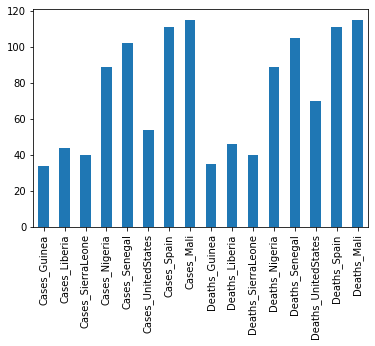

In [ ]:
ma.isna().sum().plot(kind='bar')

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
ma.dropna(thresh=3, inplace= True)

In [ ]:
ma.shape

(127, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
ma.isna().sum() # 6 Cases_Senegal, Cases_Spain, Cases_Mali , Deaths_Senegal  , Deaths_Spain , Deaths_Mali 

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

In [ ]:
ma.shape

(127, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
print(ma['Cases_Liberia'].skew())
print(ma['Cases_Liberia'].kurt())

# It is right skewed. so we Will use Median to fill in missing values.

0.9491336030709361
-0.742875748189892


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


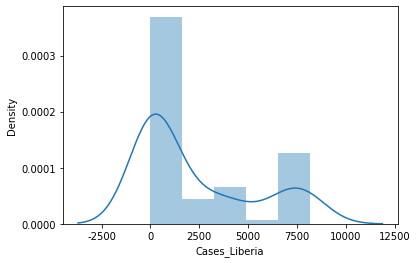

In [ ]:
sns.distplot(ma['Cases_Liberia'])
plt.xkcd()
plt.show()

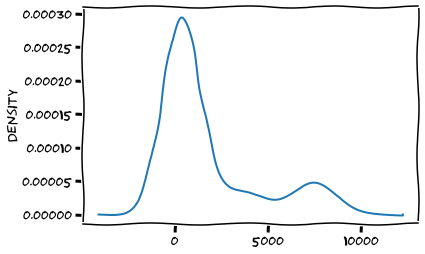

In [ ]:
ma['Cases_Liberia'].fillna(ma['Cases_Liberia'].median()).plot(kind='kde')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


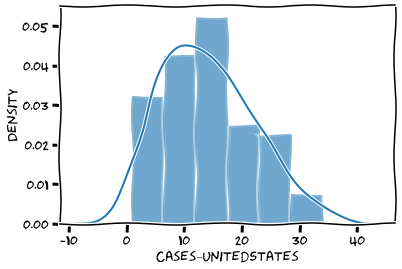

In [ ]:
sns.distplot(ma['Cases_UnitedStates'])
plt.xkcd()
plt.show()

In [ ]:
print(ma['Cases_UnitedStates'].skew())
print(ma['Cases_UnitedStates'].kurt())

# Mean is slightly skewed, so we can use mean to fill missing values. 

0.4685235032170701
-0.41380010329328076


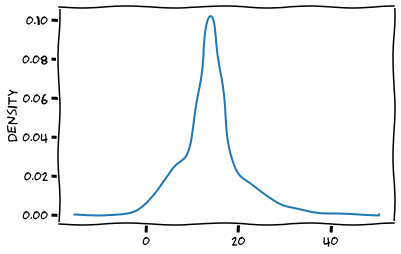

In [ ]:
ma['Cases_UnitedStates'].fillna(ma['Cases_UnitedStates'].mean()).plot(kind='kde')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


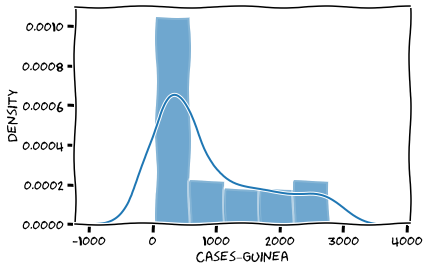

In [ ]:
# Cases_Guinea
sns.distplot(ma['Cases_Guinea'])
plt.xkcd()
plt.show()

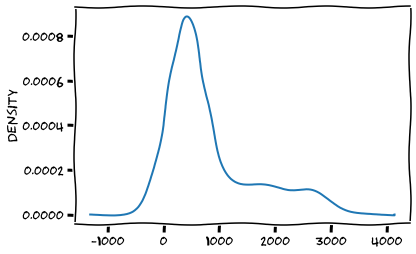

In [ ]:
ma['Cases_Guinea'].fillna(ma['Cases_Guinea'].median()).plot(kind='kde')

In [ ]:
print(ma['Cases_Guinea'].skew())
print(ma['Cases_Guinea'].kurt())

# we can choose median to fill missing values as mean is skewed. 

1.0023009483886705
-0.3536475847179972


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
for i in ho.select_dtypes(include='number'):
  print(i, ho[i].skew(), ho[i].kurt())

Rooms 0.33752755616911884 0.7268628551867531
Price 2.5112396135820827 9.971715889795528
Bathroom 1.8257840393009035 10.413550039459059
Car 4.187194736456107 85.21700249269362
Landsize 52.58894892969384 3262.168219567789
Distance 0.016669076752245382 -0.04183358907962598
Bedroom 3.903058112122258 89.74295627631867


In [ ]:
# Landsize and car are heavily skewed and have heavy kurtosis so they can be removed from analysis.

0       826
650      23
696      19
700      16
590      16
       ... 
1177      1
1185      1
1197      1
1205      1
1437      1
Name: Landsize, Length: 1028, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
q1= ho['Car'].quantile(0.25)
q3= ho['Car'].quantile(0.75)
iqr= q3-q1
ul= q3 + 1.5*iqr
ll= q1 - 1.5*iqr

ho[(ho['Car'] > ul) | (ho['Car'] < ll)]['Car']


56      5
58      4
117     4
122     4
123     4
       ..
4585    4
4586    4
4588    4
4641    5
4690    4
Name: Car, Length: 206, dtype: int64

In [ ]:
sns.distplot(ho['Car'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


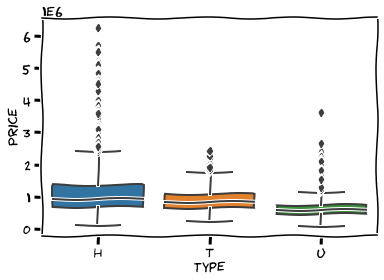

In [ ]:
# Outliers in type H are far more than outliers in type T and type U. 
sns.boxplot(ho['Type'], ho['Price'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
ho.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom', 'dist'],
      dtype='object')

In [ ]:
# maximum value:
q1= ho['Rooms'].quantile(0.25)
q3= ho['Rooms'].quantile(0.75)
iqr= q3-q1
ul= q3 + 1.5*iqr
ll= q1 - 1.5*iqr
print(ul)
print(ll)


7.0
-1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


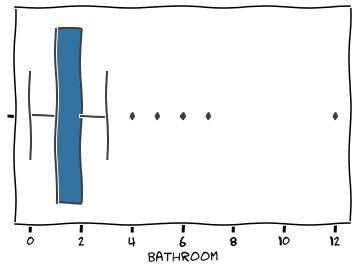

In [ ]:
# we can use IQR method to find out outliers or we can visualize it using boxplot.

sns.boxplot(ho['Bathroom'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
q1= ho['Bedroom'].quantile(0.25)
q3= ho['Bedroom'].quantile(0.75)
iqr= q3-q1
ul= q3 + 1.5*iqr
ll= q1 - 1.5*iqr
print(q1)
print(q3)
print(ul)
print(ll)
print(iqr)

2.0
4.0
7.0
-1.0
2.0


In [ ]:
er= []
for i in range(len(ho['Bedroom'])):
  if ho['Bedroom'][i] > 7 or ho['Bedroom'][i] < -1:
    er.append(ho['Bedroom'][i])

In [ ]:
for i in range(len(ho['Bedroom'])):
  if ho['Bedroom'][i] in er:
    print(ho.iloc[i])

Rooms                             3
Type                              t
Price                       1100000
Method                            S
Regionname    Southern Metropolitan
Bathroom                          1
Car                               1
Landsize                          0
Distance                       12.1
Bedroom                           8
dist                       near CBD
Name: 279, dtype: object
Rooms                                  2
Type                                   u
Price                             612000
Method                                 S
Regionname    South-Eastern Metropolitan
Bathroom                               1
Car                                    2
Landsize                             766
Distance                            27.1
Bedroom                                9
dist                             far_CBD
Name: 467, dtype: object
Rooms                            3
Type                             h
Price                       47000

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
q1= ho['Distance'].quantile(0.25)
q3= ho['Distance'].quantile(0.75)
iqr= q3-q1
ul= q3 + 1.5*iqr
ll= q1 - 1.5*iqr
print(q1)
print(q3)
print(ul)
print(ll)
print(iqr)

16.5
22.2
30.75
7.950000000000001
5.699999999999999


In [ ]:
out_1 = ho[(ho['Distance'] > ul) | (ho['Distance'] < ll)]['Distance']

In [ ]:
len(out_1)

31

In [ ]:
out_1.values

array([33.1, 31.3, 31.7,  7.5, 31. , 31.9, 31.3,  6.7,  6. , 31.6,  7. ,
        6.6, 30.9, 31.5, 31.1, 31.1,  7.1,  7.1,  7.1,  7.8,  5. , 31.6,
       32.6, 31. , 30.9, 30.9, 32.2,  7.3, 30.9,  6.3, 31.2])

In [ ]:
t= []
for i in range(len(ho['Distance'])):
  if ho['Distance'][i] not in out_1.values:
    t.append(ho['Distance'][i])

In [ ]:
# before handling outliers:
print(len(ho['Distance']))
ho['Distance'].mean()

4766


19.32834662190515

In [ ]:
print(len(t))
sum(t)/len(t)

4735


19.311425554382247

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


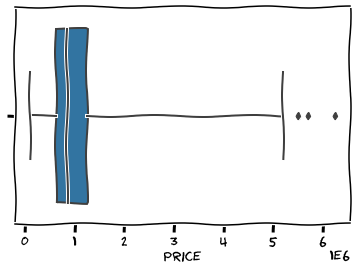

In [ ]:
# 6.5 should be the range
sns.boxplot(ho['Price'], whis=6.5)

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
ho['Distance'].describe()

count    4766.000000
mean       19.328347
std         4.230650
min         5.000000
25%        16.500000
50%        19.300000
75%        22.200000
max        33.100000
Name: Distance, dtype: float64

In [ ]:
ho['dist'] = [i for i in range(len(ho['Bathroom']))]
for i in range(len(ho['Distance'])):
  if ho['Distance'][i] <= 14:
    ho['dist'][i] = 'near CBD'
  elif ho['Distance'][i] <= 24:
    ho['dist'][i] = 'mid-CBD'
  else:
    ho['dist'][i] = 'far_CBD'

In [ ]:
ho.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,dist
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,far_CBD
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,mid-CBD
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,mid-CBD
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,mid-CBD
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,mid-CBD


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
ho['dist'].value_counts()

mid-CBD     3662
far_CBD      592
near CBD     512
Name: dist, dtype: int64

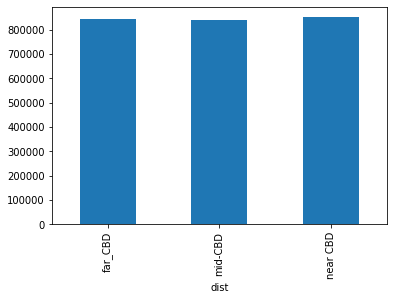

In [ ]:
ho['Price'].groupby(ho['dist']).median().plot(kind='bar')

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.model_selection import train_test_split

a,b = train_test_split(ho['Price'], test_size= 0.2) 